In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pathlib import Path 
from math import ceil

# No Emission Limit Capacity Expansion Results

## Read in OSeMOSYS Results

In [2]:
annual_emissions = pd.read_csv('./Model/Results/No_Emission_Limit/AnnualEmissions.csv')
capital_investments = pd.read_csv('./Model/Results/No_Emission_Limit/CapitalInvestment.csv')
new_capacity = pd.read_csv('./Model/Results/No_Emission_Limit/NewCapacity.csv')
demand = pd.read_csv('./Model/Results/No_Emission_Limit/Demand.csv')
production_annual = pd.read_csv('./Model/Results/No_Emission_Limit/ProductionByTechnologyAnnual.csv')
total_capacity = pd.read_csv('./Model/Results/No_Emission_Limit/TotalCapacityAnnual.csv')

## Filter and Aggregate Results

In [3]:
capital_investments = capital_investments.loc[capital_investments['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
new_capacity = new_capacity.loc[new_capacity['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
production_annual = production_annual.loc[production_annual['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
total_capacity = total_capacity.loc[total_capacity['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()

/tmp/ipykernel_22927/1224771057.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()


## Plot Results

### Installed Capacity 

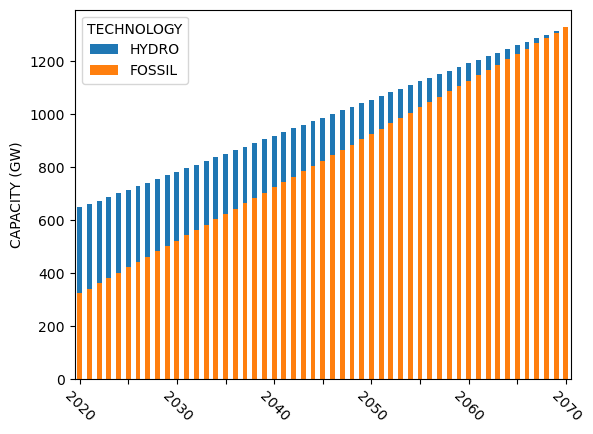

In [4]:
total_capacity_2 = total_capacity.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = total_capacity_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

ax.set_ylabel('CAPACITY (GW)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

### Electricity Generation

In [5]:
def add_legend_line(legend):
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([],[],color='k'))
    labels.append("Demand")
    for h,l in enumerate(labels):
        if l == 'VALUE':
            labels.remove(l)
            del handles[h]

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

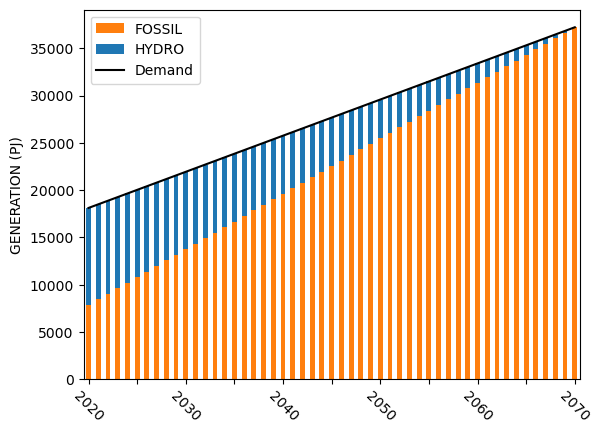

In [6]:
production_annual_2 = production_annual.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = production_annual_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

xticks = ax.get_xticks()

demand['VALUE'].plot(
    x=xticks,
    ax=ax,
    color='k')

ax.set_ylabel('GENERATION (PJ)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

legend = ax.legend()
add_legend_line(legend)

### Capital Investments 

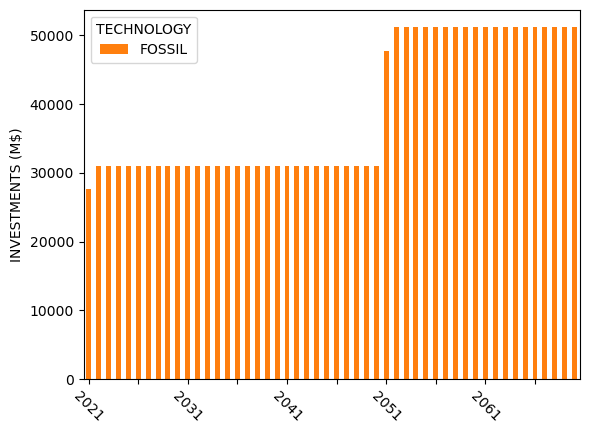

In [6]:
capital_investments_2 = capital_investments.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = capital_investments_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

ax.set_ylabel('INVESTMENTS (M$)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

### Emissions

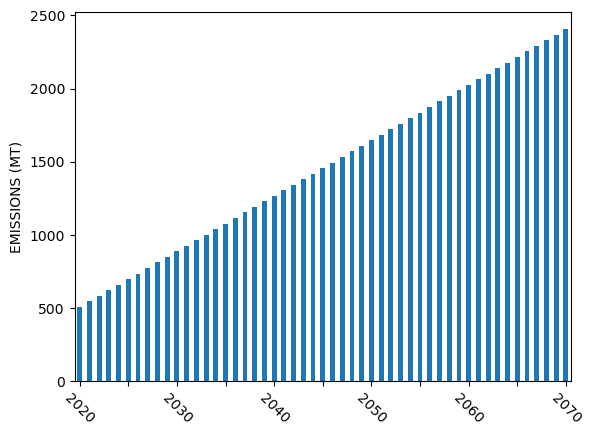

In [7]:
ax = annual_emissions.plot.bar( 
    x='YEAR',
    y='VALUE',
    legend=False
)

ax.set_ylabel('EMISSIONS (MT)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

# With Emission Penalty Limit Expansion Results

## Read in OSeMOSYS Results

In [8]:
annual_emissions = pd.read_csv('./Model/Results/With_Emission_Limit/AnnualEmissions.csv')
capital_investments = pd.read_csv('./Model/Results/With_Emission_Limit/CapitalInvestment.csv')
new_capacity = pd.read_csv('./Model/Results/With_Emission_Limit/NewCapacity.csv')
demand = pd.read_csv('./Model/Results/With_Emission_Limit/Demand.csv')
production_annual = pd.read_csv('./Model/Results/With_Emission_Limit/ProductionByTechnologyAnnual.csv')
total_capacity = pd.read_csv('./Model/Results/With_Emission_Limit/TotalCapacityAnnual.csv')

## Filter and Aggregate Results

In [9]:
capital_investments = capital_investments.loc[capital_investments['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
new_capacity = new_capacity.loc[new_capacity['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
production_annual = production_annual.loc[production_annual['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
total_capacity = total_capacity.loc[total_capacity['TECHNOLOGY'].isin(['HYDRO', 'FOSSIL'])].reset_index(drop=True)
demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()

/tmp/ipykernel_22927/1224771057.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()


### Installed Capacity

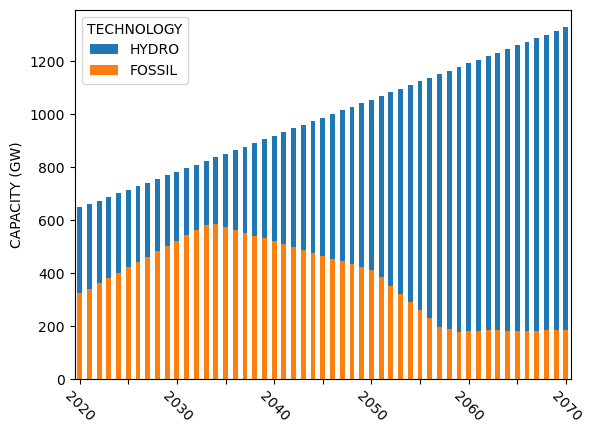

In [10]:
total_capacity_2 = total_capacity.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = total_capacity_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

ax.set_ylabel('CAPACITY (GW)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

### Electricity Generation

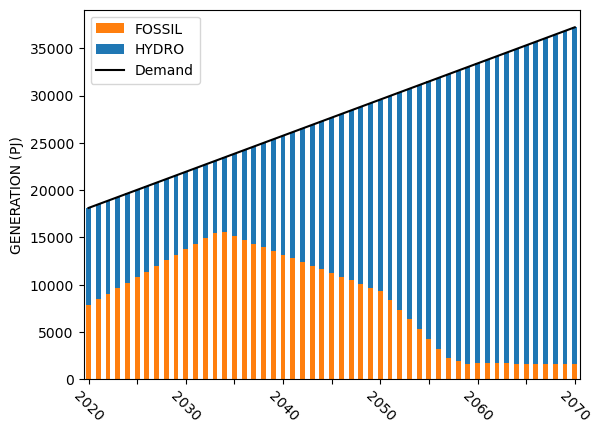

In [11]:
production_annual_2 = production_annual.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = production_annual_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

xticks = ax.get_xticks()

demand['VALUE'].plot(
    x=xticks,
    ax=ax,
    color='k')

ax.set_ylabel('GENERATION (PJ)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

legend = ax.legend()
add_legend_line(legend)

### Capital Investments

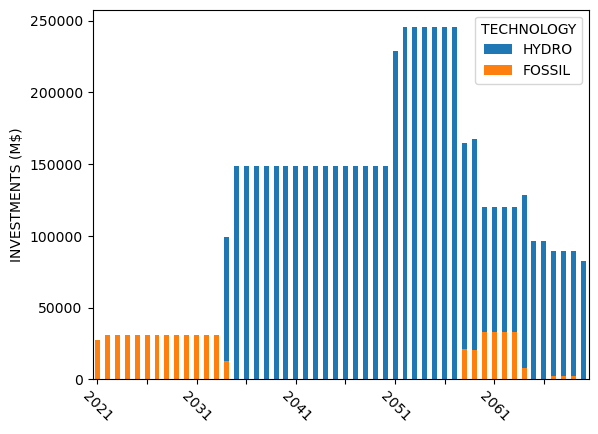

In [12]:
capital_investments_2 = capital_investments.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = capital_investments_2.plot.bar( 
    stacked=True,
    legend='reverse',
    color=['tab:orange','tab:blue']
)

ax.set_ylabel('INVESTMENTS (M$)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

### Emissions

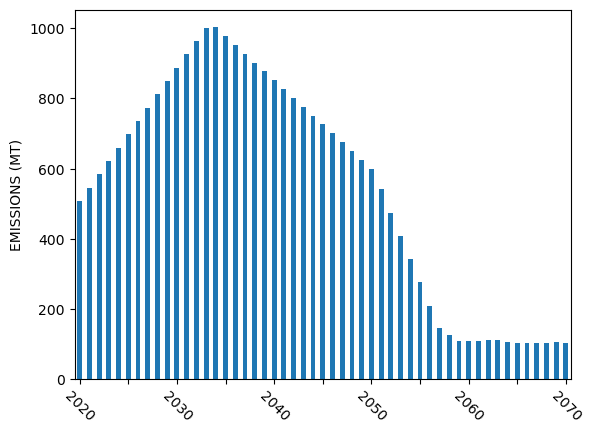

In [13]:
ax = annual_emissions.plot.bar( 
    x='YEAR',
    y='VALUE',
    legend=False
)

ax.set_ylabel('EMISSIONS (MT)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

# GSA Results

## Read In GSA Objective Cost Results
SALib dones not have fuctionality to compare results from multiple GSA runs on a single graph. Therefore, we replicate their plotting functions here which allow us to compare results across multiple GSA runs. 

### Objective cost without emission limit

In [14]:
model_1 = pd.read_csv('./GSA/No_Emission_Limit/Results/SA_objective.csv')
model_1.columns.values[0]='names'
# Row of zeros added for consistency when merging dataframes
model_1 = pd.concat([model_1,pd.DataFrame([['EmissionLimit',0,0,0,0]], columns=model_1.columns)])
model_1['model'] = 'Model 1'

### Objective cost with emission limit

In [15]:
model_2 = pd.read_csv('./GSA/With_Emission_Limit/Results/SA_objective.csv')
model_2.columns.values[0]='names'
model_2['model'] = 'Model 2'

### Append and sort objective cost results

In [16]:
model = pd.concat([model_1, model_2])
model = model.set_index('model')

m1 = model.loc[model.index == 'Model 1'].copy()
m1 = m1.sort_values(by='mu_star')

m2 = model.loc[model.index == 'Model 2'].copy()
m2 = m2.set_index('names').reindex(m1.names)
m2 = m2.fillna(0)
m2['names'] = m2.index
m2['model'] = 'Model 2'
m2 = m2.reset_index(drop=True).set_index('model')
m2 = m2[m1.columns]

## Plot Results 

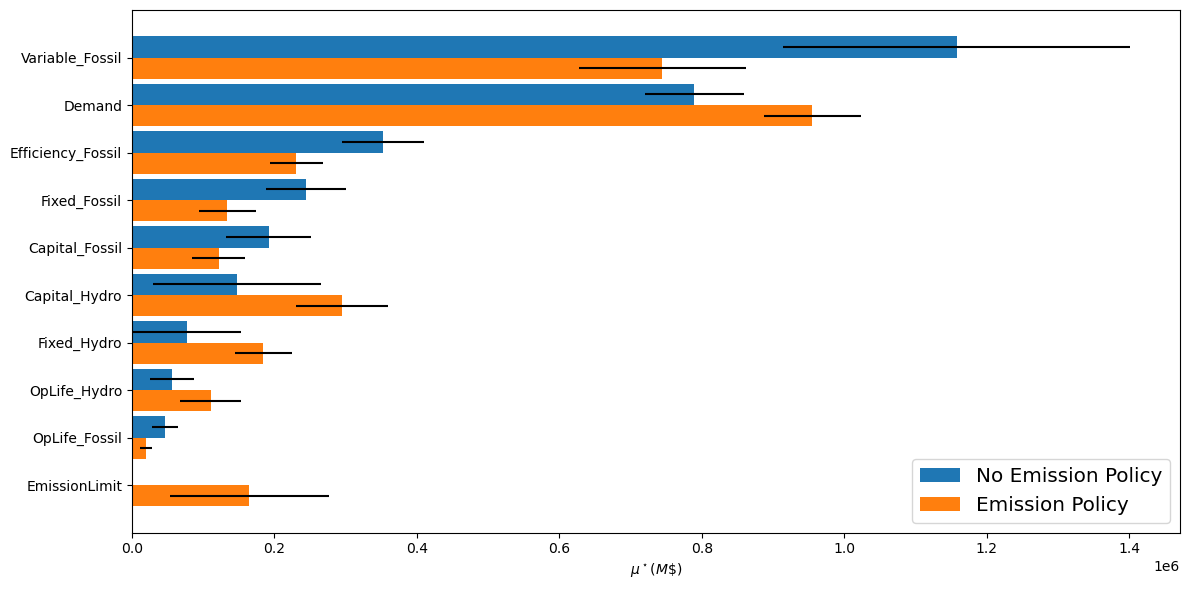

In [17]:
labels = list(m1['names'].unique())
m1_mu_star = m1['mu_star'].to_list()
m2_mu_star = m2['mu_star'].to_list()

m1_mu_star_conf = m1['mu_star_conf'].to_list()
m2_mu_star_conf = m2['mu_star_conf'].to_list()

y = np.arange(len(labels))
height = 0.45

fig, ax = plt.subplots(figsize=(12,6))
m1_plt = ax.barh(
    y = y + height/2,
    width=m1_mu_star,
    height=height,
    xerr=m1_mu_star_conf,
    align="center",
    ecolor="black",
    label='No Emission Policy'
)
m2_plt = ax.barh(
    y = y - height/2,
    width=m2_mu_star,
    height=height,
    xerr=m2_mu_star_conf,
    align="center",
    ecolor="black",
    label='Emission Policy'
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(r"$\mu^\star$")
ax.legend(fontsize='x-large', loc='lower right')
y_pos = np.arange(len(m1_mu_star))
ax.set_yticks(y_pos)
lables = labels
ax.set_yticklabels(labels)
ax.set_xlabel(r"$\mu^\star (M\$)$")
ax.set_ylim(min(y_pos) - 1, max(y_pos) + 1)

fig.tight_layout()

## Read in GSA New Capacity Results with the Emission Limit

### New hydro capacity results with emission limit

In [19]:
cap_hyd = pd.read_csv('./GSA/With_Emission_Limit/Results/SA_NewCapacityHydro.csv')
cap_hyd.columns.values[0]='names'
cap_hyd['Tech'] = 'Hydro'

### New fossil fuel  capacity results with emission limit

In [20]:
cap_fos = pd.read_csv('./GSA/With_Emission_Limit/Results/SA_NewCapacityFossil.csv')
cap_fos.columns.values[0]='names'
cap_fos['Tech'] = 'Fossil'

### Append and sort data

In [21]:
model = pd.concat([cap_hyd, cap_fos])
model = model.set_index('Tech')

hyd = model.loc[model.index == 'Hydro'].copy()
hyd = hyd.sort_values(by='mu_star')

fos = model.loc[model.index == 'Fossil'].copy()
fos = fos.set_index('names').reindex(hyd.names)
fos = fos.fillna(0)
fos['names'] = fos.index
fos['Tech'] = 'Fossil'
fos = fos.reset_index(drop=True).set_index('Tech')
fos = fos[hyd.columns]

### Plot Data

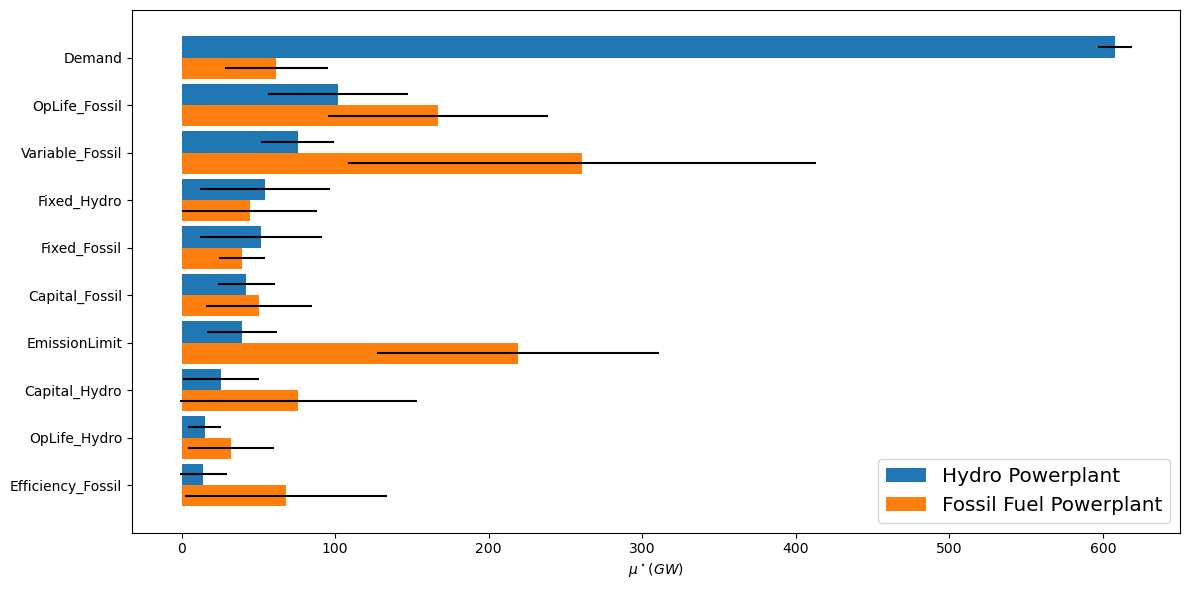

In [22]:
labels = list(hyd['names'].unique())
hyd_mu_star = hyd['mu_star'].to_list()
fos_mu_star = fos['mu_star'].to_list()

hyd_mu_star_conf = hyd['mu_star_conf'].to_list()
fos_mu_star_conf = fos['mu_star_conf'].to_list()

y = np.arange(len(labels))
height = 0.45

fig, ax = plt.subplots(figsize=(12,6))
m1_plt = ax.barh(
    y = y + height/2,
    width=hyd_mu_star,
    height=height,
    xerr=hyd_mu_star_conf,
    align="center",
    ecolor="black",
    label='Hydro Powerplant'
)
m2_plt = ax.barh(
    y = y - height/2,
    width=fos_mu_star,
    height=height,
    xerr=fos_mu_star_conf,
    align="center",
    ecolor="black",
    label='Fossil Fuel Powerplant'
)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(r"$\mu^\star$")
ax.legend(fontsize='x-large', loc='lower right')
y_pos = np.arange(len(hyd_mu_star))
ax.set_yticks(y_pos)
lables = labels
ax.set_yticklabels(labels)
ax.set_xlabel(r"$\mu^\star (GW)$")

ax.set_ylim(min(y_pos) - 1, max(y_pos) + 1)

fig.tight_layout()

## Method of Morris for emissions
**NOTE**: This requires the input sample and results from each model run. To replicate these results, the user will need to run the model themselves to generate the results. 

### Get sample and parameters

In [23]:
sample = np.loadtxt('./../../modelruns/0/morris_sample.txt', delimiter=",")
params = pd.read_csv('./../../config/parameters.csv')
df_sample = pd.DataFrame(sample, columns=params['group'].to_list())
df_sample = df_sample.loc[:,~df_sample.columns.duplicated()]

### Get resutls for all model runs 

In [24]:
models = list(Path('./../../results/0/').glob("model_*"))
dfs = []
for model in models:
    model_num = model.parts[-1].split('_')[-1]
    df = pd.read_csv(Path(model,'results','NewCapacity.csv'))
    df["MODEL"] = model_num
    dfs.append(df)
df = pd.concat(dfs).reset_index(drop=True)
df['MODEL'] = df['MODEL'].astype(int)

### Group data

In [25]:
techs = df.loc[df['TECHNOLOGY'].isin(['FOSSIL', 'HYDRO'])].drop(['REGION'], axis=1)
data = techs.groupby(by=['MODEL','TECHNOLOGY']).sum().reset_index().drop(['YEAR'],axis=1)

### Plot

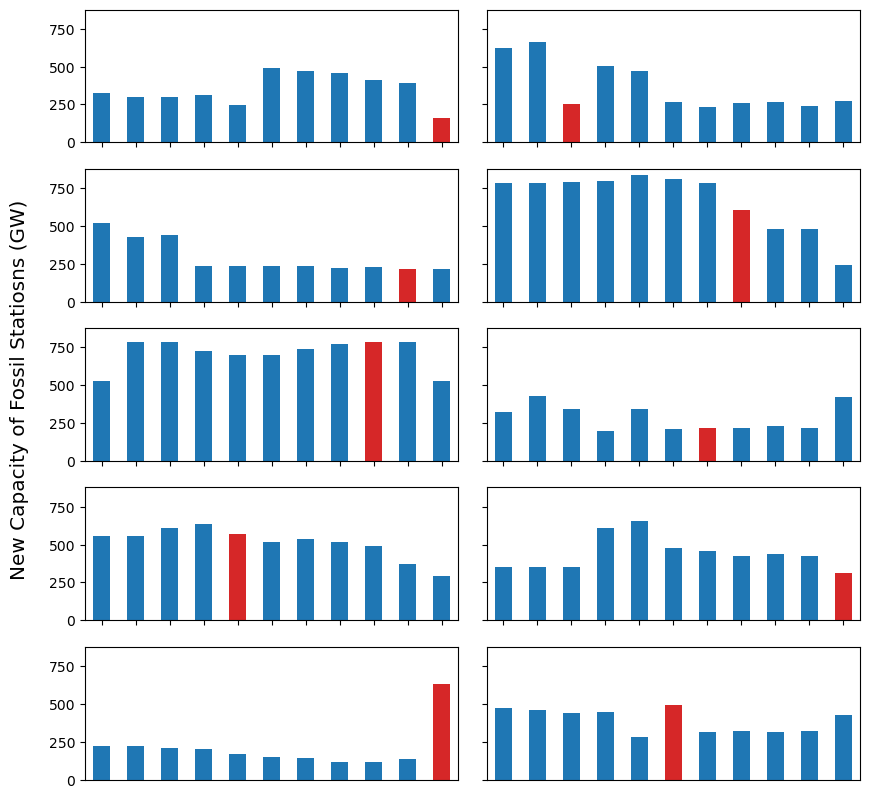

In [26]:
num_trajectories = len(df_sample.columns)
runs_per_trajectory = int(len(df_sample) / num_trajectories)
trajectories = {}
results = {}

data2 = data.loc[data['TECHNOLOGY'] == 'FOSSIL'].reset_index(drop=True)

for trajectory in range(num_trajectories):
    start = runs_per_trajectory * trajectory 
    end = (start + runs_per_trajectory - 1)
    trajectories[trajectory] = df_sample.loc[start:end,:]
    results[trajectory] = data2.loc[start:end,:]

num_plots = len(trajectories)
num_rows = ceil(num_plots / 2)
fig, axs = plt.subplots(nrows=num_rows, ncols=2, sharex=True, sharey=True, figsize=(10,10), gridspec_kw = {'wspace':0.075, 'hspace':0.2})

row = 0
col = 0
for i, trajectory in trajectories.items():
    colour_change = np.where(np.diff(trajectory['Variable_Fossil'], prepend=np.nan))[0][-1] # Where Variable_Fossil value changes 
    colours = ['tab:blue'] * runs_per_trajectory
    colours[colour_change] = 'tab:red'
    results[i]['VALUE'].plot.bar(
        ax = axs[row][col],
        color=colours,
    )
    col += 1
    if col > 1:
        col = 0
        row += 1

fig.supylabel('New Capacity of Fossil Statiosns (GW)', fontsize='x-large', x=0.05)
axs[num_rows - 1, 0].get_xaxis().set_visible(False)
axs[num_rows - 1, 1].get_xaxis().set_visible(False)